In [8]:
import pandas as pd
import numpy as np
from itertools import permutations

In [2]:
df=pd.read_csv('online_retail.csv')
df.shape

(227760, 3)

In [3]:
df.head()

,InvoiceNo,StockCode,Description
0,562583,35637A,IVORY STRING CURTAIN WITH POLE
1,562583,35638A,PINK AND BLACK STRING CURTAIN
2,562583,84927F,PSYCHEDELIC TILE HOOK
3,562583,22425,ENAMEL COLANDER CREAM
4,562583,16008,SMALL FOLDING SCISSOR(POINTED EDGE)


# Preprocessing

In [4]:
df['Description']=df['Description'].astype(str)

In [5]:
transactions=list(df.groupby('InvoiceNo')['Description'].apply(list))

In [6]:
transactions[0]

['DOORMAT RED RETROSPOT',
 'DOORMAT WELCOME SUNRISE',
 'DOORMAT MULTICOLOUR STRIPE',
 'PACK OF 72 SKULL CAKE CASES',
 'PACK OF 60 PINK PAISLEY CAKE CASES',
 'PACK OF 60 MUSHROOM CAKE CASES',
 'PACK OF 72 RETROSPOT CAKE CASES',
 '72 SWEETHEART FAIRY CAKE CASES',
 '60 TEATIME FAIRY CAKE CASES',
 'SET OF 36 PAISLEY FLOWER DOILIES',
 'SET OF 36 MUSHROOM PAPER DOILIES',
 'SET OF 72 SKULL PAPER  DOILIES',
 'SET/10 BLUE POLKADOT PARTY CANDLES',
 'SET/10 PINK POLKADOT PARTY CANDLES',
 'SET/10 IVORY POLKADOT PARTY CANDLES',
 'SET/10 RED POLKADOT PARTY CANDLES']

### create all possible rules

In [9]:
flattened=[x for t in transactions for x in t ]
unique=list(set(flattened))
all_rules=list(permutations(unique,2))

### Transaction to Onehot

In [158]:
from mlxtend.preprocessing import TransactionEncoder

encoder=TransactionEncoder().fit(transactions)
onehot=encoder.transform(transactions)

In [159]:
df=pd.DataFrame(onehot,columns=encoder.columns_)
df.head()

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,wet boxes,wet pallet,wet rusty,wet?,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


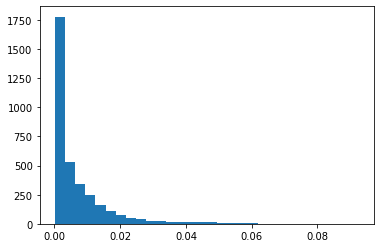

In [173]:
import matplotlib.pyplot as plt
plt.hist(list(df.mean()),bins=30)
plt.show()

In [174]:
np.median(list(df.mean()))

0.002883922134102379

# Visualzize & Pruning

In [165]:
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
# frequent items
frequent_items=apriori(df,min_support=0.01,max_len=2,use_colnames=True)
frequent_items

,support,itemsets
0,0.012257,( 50'S CHRISTMAS GIFT BAG LARGE)
1,0.012772,( DOLLY GIRL BEAKER)
2,0.013596,(10 COLOUR SPACEBOY PEN)
3,0.010506,(12 MESSAGE CARDS WITH ENVELOPES)
4,0.020805,(12 PENCIL SMALL TUBE WOODLAND)
...,...,...
1845,0.024719,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."
1846,0.035843,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE..."
1847,0.022350,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE..."
1848,0.025028,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR..."


In [176]:
# generate association rules (including all frequent items)
rules=association_rules(frequent_items,metric='support',min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SET 12 COLOUR PENCILS SPACEBOY ),(12 PENCIL SMALL TUBE WOODLAND),0.026367,0.020805,0.010609,0.402344,19.338393,0.010060,1.638391
1,(12 PENCIL SMALL TUBE WOODLAND),(SET 12 COLOUR PENCILS SPACEBOY ),0.020805,0.026367,0.010609,0.509901,19.338393,0.010060,1.986604
2,(WOOD 2 DRAWER CABINET WHITE FINISH),(3 DRAWER ANTIQUE WHITE WOOD CABINET),0.026367,0.020187,0.011639,0.441406,21.865374,0.011106,1.754070
3,(3 DRAWER ANTIQUE WHITE WOOD CABINET),(WOOD 2 DRAWER CABINET WHITE FINISH),0.020187,0.026367,0.011639,0.576531,21.865374,0.011106,2.299181
4,(4 TRADITIONAL SPINNING TOPS),(VINTAGE SNAP CARDS),0.022247,0.049748,0.010609,0.476852,9.585413,0.009502,1.816412
...,...,...,...,...,...,...,...,...,...
2205,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.045628,0.028633,0.022350,0.489842,17.107467,0.021044,1.904051
2206,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.045628,0.028633,0.025028,0.548533,19.157210,0.023722,2.151577
2207,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.028633,0.045628,0.025028,0.874101,19.157210,0.023722,7.580442
2208,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(ZINC FOLKART SLEIGH BELLS),0.045628,0.040169,0.010300,0.225734,5.619610,0.008467,1.239665


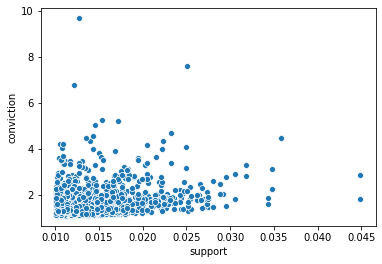

In [206]:
sns.scatterplot(x='support',y='conviction',data=rules)
plt.show()

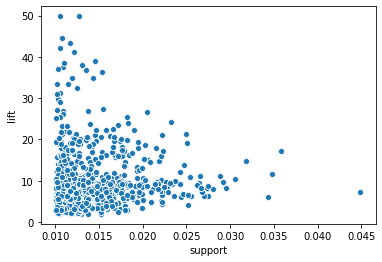

In [205]:
sns.scatterplot(x='support',y='lift',data=rules)
plt.show()

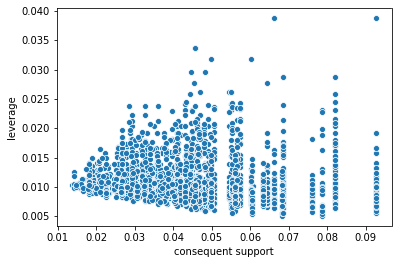

In [220]:
sns.scatterplot(x='consequent support',y='leverage',data=rules)
plt.show()

In [224]:
# Apply a 0.002 antecedent support threshold, 0.60 confidence threshold, and 2.50 lift threshold
filtered_rules = rules[(rules['consequent support']>0.05)&
                        (rules['antecedent support'] > 0.05) &
                        (rules['lift'] > 5) &
                        (rules['conviction'] >1)]

In [225]:
filtered_rules.iloc[:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
346,(HOT WATER BOTTLE KEEP CALM),(CHOCOLATE HOT WATER BOTTLE),0.078587,0.054898,0.027500,0.349934,6.374322,0.023186,1.453857
347,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.054898,0.078587,0.027500,0.500938,6.374322,0.023186,1.846290
348,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE TEA AND SYMPATHY),0.054898,0.054486,0.029148,0.530957,9.744915,0.026157,2.015837
349,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.054486,0.054898,0.029148,0.534972,9.744915,0.026157,2.032355
714,(HOT WATER BOTTLE KEEP CALM),(HOT WATER BOTTLE TEA AND SYMPATHY),0.078587,0.054486,0.026985,0.343381,6.302249,0.022703,1.439975
715,(HOT WATER BOTTLE TEA AND SYMPATHY),(HOT WATER BOTTLE KEEP CALM),0.054486,0.078587,0.026985,0.495274,6.302249,0.022703,1.825571
900,(JUMBO BAG VINTAGE DOILY ),(JUMBO BAG 50'S CHRISTMAS ),0.068493,0.064270,0.022144,0.323308,5.030449,0.017742,1.382801
901,(JUMBO BAG 50'S CHRISTMAS ),(JUMBO BAG VINTAGE DOILY ),0.064270,0.068493,0.022144,0.344551,5.030449,0.017742,1.421174
1178,(JUMBO BAG VINTAGE DOILY ),(JUMBO BAG RED RETROSPOT),0.068493,0.081883,0.034298,0.500752,6.115472,0.028690,1.839000
1179,(JUMBO BAG RED RETROSPOT),(JUMBO BAG VINTAGE DOILY ),0.081883,0.068493,0.034298,0.418868,6.115472,0.028690,1.602918


### Define a function to compute Zhang's metric

In [252]:
def zhang_rule(rules):
    supportAC=rules['support']
    supportA=rules['antecedent support']
    supportC=rules['consequent support']
    numerator=supportAC-supportA*supportC
    denominator=max(supportAC*(1-supportA),(supportC-supportAC)*supportA)
    return numerator/denominator

In [270]:
rules['zhang']=rules.apply(zhang_rule,axis=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(SET 12 COLOUR PENCILS SPACEBOY ),(12 PENCIL SMALL TUBE WOODLAND),0.026367,0.020805,0.010609,0.402344,19.338393,0.010060,1.638391,0.973970
1,(12 PENCIL SMALL TUBE WOODLAND),(SET 12 COLOUR PENCILS SPACEBOY ),0.020805,0.026367,0.010609,0.509901,19.338393,0.010060,1.986604,0.968438
2,(WOOD 2 DRAWER CABINET WHITE FINISH),(3 DRAWER ANTIQUE WHITE WOOD CABINET),0.026367,0.020187,0.011639,0.441406,21.865374,0.011106,1.754070,0.980108
3,(3 DRAWER ANTIQUE WHITE WOOD CABINET),(WOOD 2 DRAWER CABINET WHITE FINISH),0.020187,0.026367,0.011639,0.576531,21.865374,0.011106,2.299181,0.973927
4,(4 TRADITIONAL SPINNING TOPS),(VINTAGE SNAP CARDS),0.022247,0.049748,0.010609,0.476852,9.585413,0.009502,1.816412,0.916055
...,...,...,...,...,...,...,...,...,...,...
2205,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.045628,0.028633,0.022350,0.489842,17.107467,0.021044,1.904051,0.986561
2206,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.045628,0.028633,0.025028,0.548533,19.157210,0.023722,2.151577,0.993114
2207,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.028633,0.045628,0.025028,0.874101,19.157210,0.023722,7.580442,0.975739
2208,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(ZINC FOLKART SLEIGH BELLS),0.045628,0.040169,0.010300,0.225734,5.619610,0.008467,1.239665,0.861353


In [266]:
sum(rules.lift<1)

0

### Aggregation

In [273]:
# Select the column headers for sign items
sign_headers = [i for i in df.columns if i.lower().find('sign')>=0]

# Select columns of sign items
sign_columns = df[sign_headers]

# Perform aggregation of sign items into sign category
signs = sign_columns.sum(axis = 1) >= 1.0

# Print support for signs
print('Share of Signs: %.2f' % signs.mean())

Share of Signs: 0.44


In [280]:
def aggregate(item):
	# Select the column headers for sign items
	item_headers = [i for i in df.columns if i.lower().find(item)>=0]

	# Select columns of sign items
	item_columns = df[item_headers]

	# Return category of aggregated items
	return item_columns.sum(axis = 1) >= 1.0

# Aggregate items for the bags, boxes, and candles categories  
bags = aggregate('bag')
boxes = aggregate('box')
candles = aggregate('candle')

In [300]:
aggregate=pd.concat([bags,boxes,candles],axis=1)
aggregate.columns=['bag','box','candle']

In [301]:
aggregate

,bag,box,candle
0,False,False,True
1,False,True,False
2,True,True,False
3,True,False,True
4,False,False,False
...,...,...,...
9704,False,False,False
9705,False,False,False
9706,False,False,False
9707,False,True,False


In [304]:
# Apply the apriori algorithm with a minimum support of 0.0
frequent_itemsets = apriori(aggregate, min_support=0.0001, use_colnames = True)

# Generate the initial set of rules using a minimum support of 0.0001
rules_aggre = association_rules(frequent_itemsets, 
                          metric = "support", min_threshold = 0.0001)

# Set minimum antecedent support to 0.35
rules_aggre = rules_aggre[rules_aggre['antecedent support'] > 0.35]

# Set maximum consequent support to 0.35
rules_aggre = rules_aggre[rules_aggre['consequent support'] < 0.35]

# Print the remaining rules
print(rules_aggre)

   antecedents    consequents  antecedent support  consequent support  \
2        (bag)       (candle)            0.371717            0.182305   
5        (box)       (candle)            0.368524            0.182305   
9        (bag)  (candle, box)            0.371717            0.127717   
11       (box)  (bag, candle)            0.368524            0.104439   

     support  confidence      lift  leverage  conviction  
2   0.104439    0.280964  1.541176  0.036673    1.137210  
5   0.127717    0.346562  1.901002  0.060533    1.251374  
9   0.086518    0.232751  1.822406  0.039043    1.136898  
11  0.086518    0.234768  2.247892  0.048029    1.170313  
